### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-11-25/triple/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241125$25^DAN_SDS_CYPS_0.01$triple.txt
20241125$25^DAN_SDS_CYPS_phos$triple.txt
20241125$25^DAN_SDS_CYPS_0.03$triple.txt
20241125$25^DAN_SDS_CYPS_0.05$triple.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, 
                         sep="\t", 
                         header=None)

        # clean the df
        if "single" in file:
            print("cleaning single")
            df = plotting.clean_single(df)
        elif "triple" in root:
            print("cleaning triple")
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")
        
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

cleaning triple
cleaning triple
cleaning triple
cleaning triple


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS,Name
0,26.0,4397.6,75.1,82.5,68.0,3.552000e+09,52.49,2.90,0.01179,55.00,...,0.003918,23.48,4.600,45.40,86.65,0.01970,193.191005,0.008349,62600000.0,DAN_SDS_CYPS_0.01
1,27.0,2531.5,59.9,68.8,46.9,3.786000e+09,32.19,3.10,0.01292,33.20,...,0.002352,27.45,2.053,52.98,49.65,0.01961,192.308406,0.005799,75480000.0,DAN_SDS_CYPS_0.01
2,28.0,5444.7,83.8,91.7,75.6,4.011000e+09,73.05,2.82,0.01177,67.85,...,0.004859,22.55,5.016,43.19,99.65,0.01830,179.461695,0.009497,57250000.0,DAN_SDS_CYPS_0.01
3,29.0,2901.3,61.4,64.7,57.1,3.748000e+09,36.31,2.78,0.01222,36.82,...,0.002626,30.95,2.103,60.17,58.75,0.02025,198.584663,0.007692,86840000.0,DAN_SDS_CYPS_0.01
4,30.0,2881.5,65.4,81.3,45.1,3.937000e+09,38.52,3.00,0.01294,37.91,...,0.002656,29.61,2.235,58.19,59.70,0.02072,203.193788,0.007472,86380000.0,DAN_SDS_CYPS_0.01


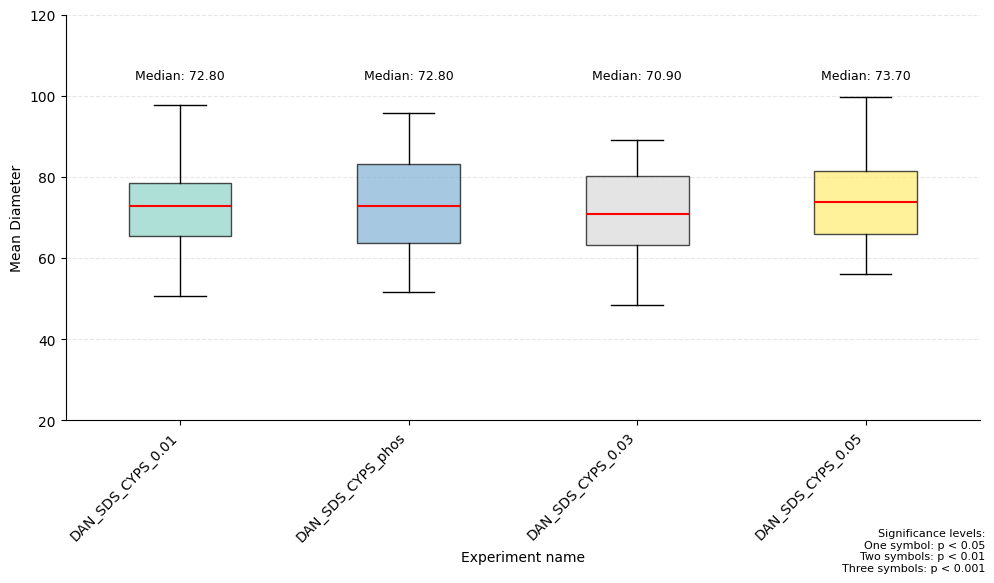

In [7]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_SDS_CYPS_0.01 and DAN_SDS_CYPS_phos: p = 0.0023
Statistical significance between DAN_SDS_CYPS_phos and DAN_SDS_CYPS_0.03: p = 0.0319
Statistical significance between DAN_SDS_CYPS_phos and DAN_SDS_CYPS_0.05: p = 0.0142


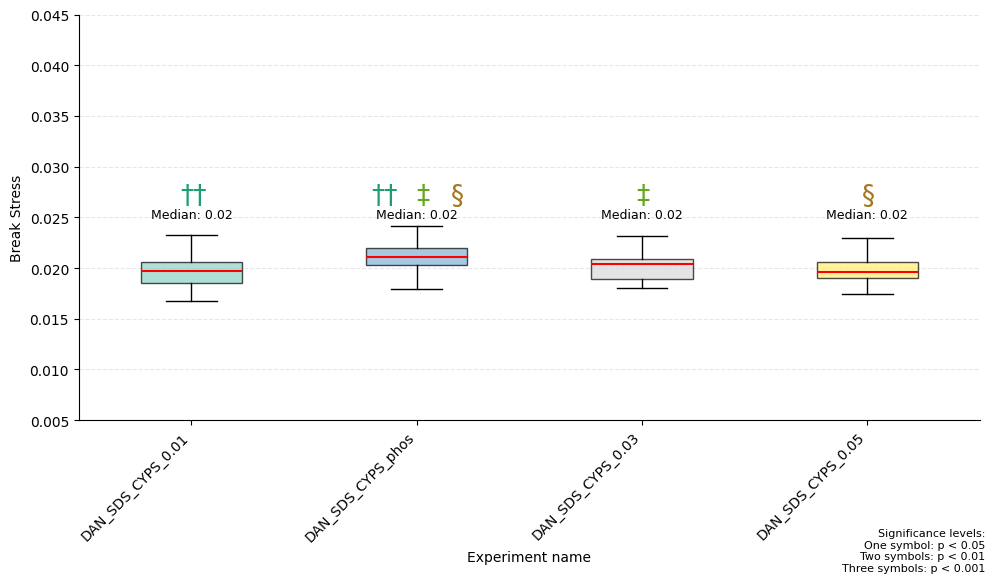

In [8]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_SDS_CYPS_0.01 and DAN_SDS_CYPS_phos: p = 0.0410
Statistical significance between DAN_SDS_CYPS_phos and DAN_SDS_CYPS_0.05: p = 0.0007
Statistical significance between DAN_SDS_CYPS_0.03 and DAN_SDS_CYPS_0.05: p = 0.0282


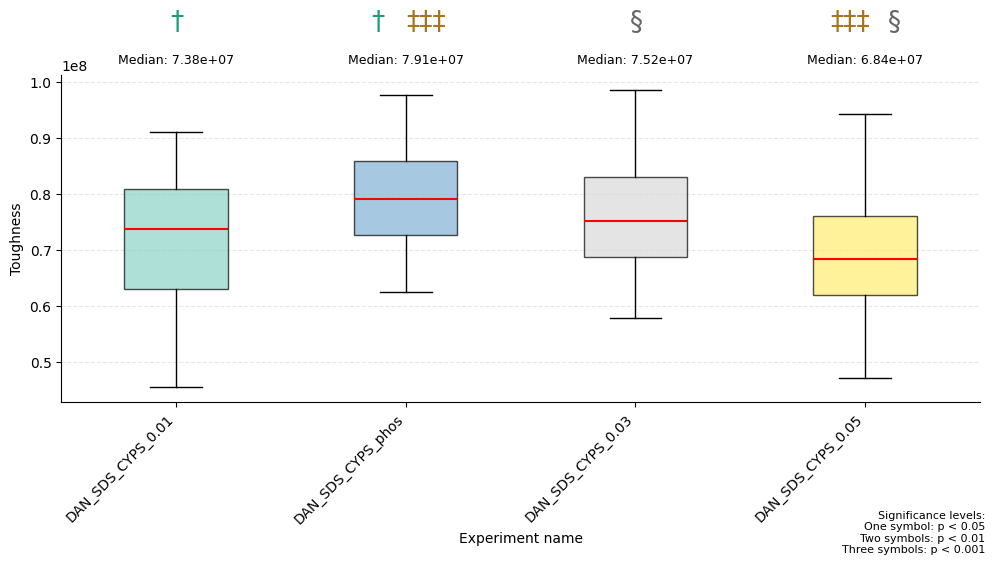

In [9]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

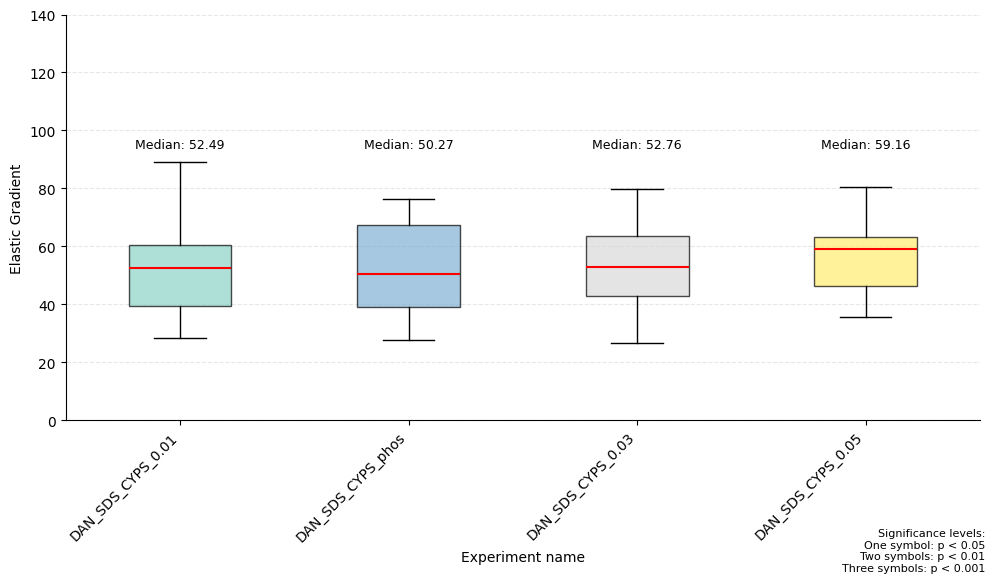

In [10]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_SDS_CYPS_0.01 and DAN_SDS_CYPS_0.03: p = 0.0126
Statistical significance between DAN_SDS_CYPS_0.01 and DAN_SDS_CYPS_0.05: p = 0.0056
Statistical significance between DAN_SDS_CYPS_phos and DAN_SDS_CYPS_0.03: p = 0.0196
Statistical significance between DAN_SDS_CYPS_phos and DAN_SDS_CYPS_0.05: p = 0.0130


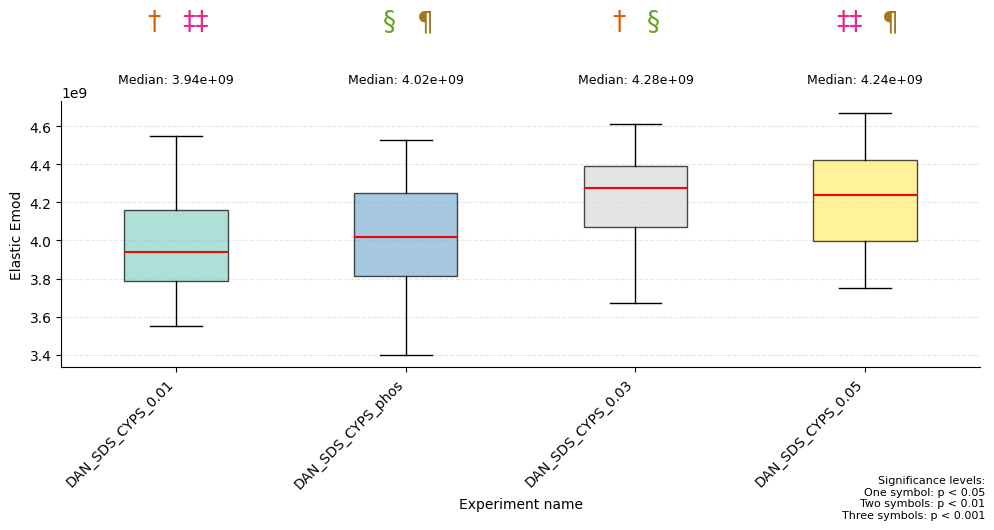

In [11]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()